In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix
from decision_tree.dec_tree import MyDecisionTree

## Тестирование (Проверочка)

In [3]:
RANDOM_STATE = 42
X = np.ones((4, 5), dtype=float) * np.arange(4)[:, None]
y = np.arange(4)[:, None] + np.asarray([0.2, -0.3, 0.1, 0.4])[:, None]
class_estimator = MyDecisionTree(max_depth=10, criterion_name='gini')

(X_l, y_l), (X_r, y_r) = class_estimator.make_split(1, 1., X, y)

assert np.array_equal(X[:1], X_l)
assert np.array_equal(X[1:], X_r)
assert np.array_equal(y[:1], y_l)
assert np.array_equal(y[1:], y_r)

In [106]:
X_t = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [1, 0], [0, 1], [0, 0], [0, 0]])
y_t = np.array([[0], [1], [1], [0], [1], [1], [0], [0]])
clf = MyDecisionTree(max_depth=2)
clf.fit(X_t, y_t)
preds = clf.predict(X_t)
accuracy_score(y_t, preds)

/home/shredder/University/DSS_Part_2/decision_tree/dec_tree.py:43: RuntimeWarning: invalid value encountered in true_divide
  p = np.sum(y, axis=0) / n # probability of each class


1.0

<AxesSubplot:>

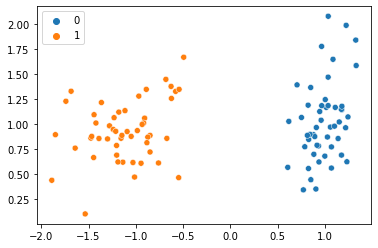

In [125]:
# Проверка корректности на классификации двух кластеров точек
from sklearn.datasets import make_classification
X_t, y_t = make_classification( n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
sns.scatterplot(x=X_t[:, 0], y=X_t[:, 1], hue=y_t)

/home/shredder/University/DSS_Part_2/decision_tree/dec_tree.py:44: RuntimeWarning: invalid value encountered in true_divide
  p = np.sum(y, axis=0) / n # probability of each class


1.0

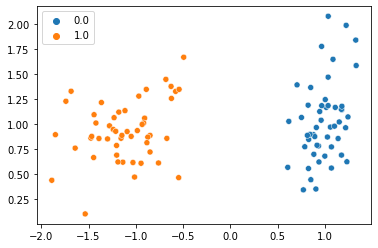

In [128]:
model = MyDecisionTree()
model.fit(X_t, y_t[:, None])
preds = model.predict(X_t)
sns.scatterplot(x=X_t[:, 0], y=X_t[:, 1], hue=preds[:, 0])
accuracy_score(y_t, preds)

In [90]:
digits_data = load_digits().data
digits_target = load_digits().target[:, None] # to make the targets consistent with our model interfaces
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_target, test_size=0.2, random_state=RANDOM_STATE)

In [70]:
reference = np.array([0.09027778, 0.09236111, 0.08333333, 0.09583333, 0.11944444,
       0.13888889, 0.09930556, 0.09444444, 0.08055556, 0.10555556])

In [92]:
class_estimator = MyDecisionTree(max_depth=10, criterion_name='entropy')
class_estimator.fit(X_train, y_train)
ans = class_estimator.predict(X_test)
accuracy_entropy = accuracy_score(y_test, ans)
print(accuracy_entropy)

0.8861111111111111


## Загрузка и анализ данных

In [112]:
data = load_wine()
X, y = data.data, data.target[:, None]
print(X.shape)
print(y.shape)


(178, 13)
(178, 1)


In [113]:
df = pd.DataFrame(
    data = np.concatenate((data.data, data.target[:, None]), axis=1), 
    columns = [*data.feature_names, 'target'])
df['target'] = df['target'].astype(int)
df.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2
10,14.10,2.16,2.30,18.0,105.0,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510.0,0
40,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795.0,0
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,1
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0,2


Проверим данные на корректность:

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [115]:
df.target.value_counts() # Подсчет классов в датасете

1    71
0    59
2    48
Name: target, dtype: int64

## Обучение и предсказание

In [143]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)
model = MyDecisionTree(max_depth=5)
model.fit(X_train, y_train)
preds = model.predict(X_val)
print(f'Accuracy: {accuracy_score(y_val, preds):.3}')
print(f'Confusion matrix:\n{multilabel_confusion_matrix(y_val, preds)}')

/home/shredder/University/DSS_Part_2/decision_tree/dec_tree.py:44: RuntimeWarning: invalid value encountered in true_divide
  p = np.sum(y, axis=0) / n # probability of each class


Accuracy: 0.944
Confusion matrix:
[[[23  1]
  [ 0 12]]

 [[21  1]
  [ 1 13]]

 [[26  0]
  [ 1  9]]]
